In [9]:
import os

import lifelines
import matplotlib.pyplot as plt
import pandas as pd
import sqlalchemy

%matplotlib inline

### Randomly sample 1 lakh data points from db

In [7]:
engine = sqlalchemy.create_engine(os.environ["db_url"])
conn = engine.connect()
query = """SELECT 
                customer_id, 
                datediff(last_transaction_time, first_transaction_time) as survived,
                1 as event_observed
           FROM db_name.customers
           WHERE transactions > 0
           ORDER BY RAND()
           LIMIT 100000;"""
df = pd.read_sql(sql=query, con=conn)

### Create survival plot

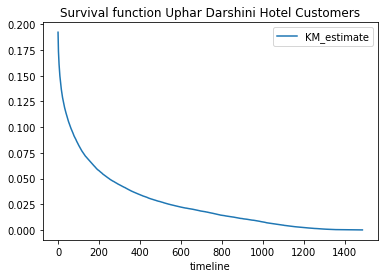

In [11]:
kmf = lifelines.KaplanMeierFitter()
kmf.fit(df["survived"], event_observed=df["event_observed"])

kmf.survival_function_.plot()
plt.title('Survival function Uphar Darshini Hotel Customers');

In [13]:
kmf.__dict__

{'alpha': 0.05,
 '_class_name': 'KaplanMeierFitter',
 '_label': 'KM_estimate',
 '_censoring_type': 3,
 'durations': array([ 0,  0,  0, ..., 82,  0,  0]),
 'event_observed': array([1, 1, 1, ..., 1, 1, 1]),
 'timeline': array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.447e+03, 1.456e+03,
        1.486e+03]),
 'entry': None,
 'event_table':           removed  observed  censored  entrance  at_risk
 event_at                                                
 0           80771     80771         0    100000   100000
 1            1164      1164         0         0    19229
 2             698       698         0         0    18065
 3             508       508         0         0    17367
 4             390       390         0         0    16859
 ...           ...       ...       ...       ...      ...
 1437            1         1         0         0        5
 1441            1         1         0         0        4
 1447            1         1         0         0        3
 1456            1       